In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

2022-07-28 14:40:50.659461: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-28 14:40:50.659528: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
heart_df = pd.read_csv("data/heart.csv")
heart_df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
#heart_df['female'] = heart_df['female'].map({'F': 1, 'M': 0})
heart_df['Sex'].replace('F',0 ,inplace=True)
heart_df['Sex'].replace('M', 1,inplace=True)
#Female is 0
#Male is 1

#ATA is 0
#NAP is 1
#ASY is 2
#TA is 3
heart_df['ChestPainType'].replace('ATA',0 ,inplace=True)
heart_df['ChestPainType'].replace('NAP',1 ,inplace=True)
heart_df['ChestPainType'].replace('ASY',2 ,inplace=True)
heart_df['ChestPainType'].replace('TA',3 ,inplace=True)

#Normal is 0
#St is 1
#LVH is 2
heart_df['RestingECG'].replace('Normal',0, inplace=True)
heart_df['RestingECG'].replace('ST',1, inplace=True)
heart_df['RestingECG'].replace('LVH',2, inplace=True)

#No is 0
#Yes is 1
heart_df['ExerciseAngina'].replace('N',0 ,inplace=True)
heart_df['ExerciseAngina'].replace('Y',1 ,inplace=True)

#ST_Slope
#Up is 0
#Flat is 1
#Down is 2
heart_df['ST_Slope'].replace('Up', 0, inplace = True)
heart_df['ST_Slope'].replace('Flat', 1, inplace = True)
heart_df['ST_Slope'].replace('Down', 2, inplace = True)

#My computer just crashed, sorry!
#np. Anthony is explaining scatter plots right now.

heart_df.head() #worky :)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


In [5]:
heart_df.dropna(inplace=True)
heart_df.shape

(918, 12)

**NOTE:** PLEASE save the scores to the score dictionary 

Models to try out:

- Decision Tree \(Emma\)
- Random Forest
- NEURAL NETWORKS  Thomas
- 
- Logistic Regression
- 
- Naive Bayes \(Jeffrey and Rhone\)
- Adaboost
- Support vector classifier
- 
- 
- Support vector classifier 
- KNN

<u>**AlSO TRY OPTIMIZING THEM**</u>

Grid Search CV

Evaluation metrics:

- F1 score
- Accuracy
- Recall
- Precision
- Confusion matrix



In [6]:
scores = {}
scores['metrics'] = {'accuracy': 'accuracy', 'precision':'precision', 'recall':'recall', 'f1_score':'f1_score'}

In [7]:
target = heart_df["HeartDisease"]
input_columns = heart_df.loc[:, heart_df.columns != "HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

In [163]:
x_train.shape

(734, 11)

In [164]:
KNN_model = KNN(n_neighbors = 7)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [165]:
y_hat = KNN_model.predict(x_test)

[1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0
 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1
 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1
 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0
 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0
 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0]
0.33152173913043476
{'accuracy': 0.6684782608695652, 'precision': 0.6684782608695652, 'recall': 0.6684782608695652, 'f1_score': 0.6684782608695652}


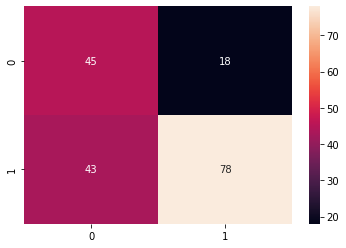

In [166]:
print(y_hat)
print(np.array(y_test))

total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat, average='micro')
recall = recall_score(y_test, y_hat, average='micro')
f1 = f1_score(y_test, y_hat, average='micro')
scores['KNN'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['KNN'])

/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1
 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0
 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1]
[0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0
 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0
 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1]
0.14673913043478262


{'accuracy': 0.8532608695652174, 'precision': 0.8532608695652174, 'recall': 0.8532608695652174, 'f1_score': 0.8532608695652174}


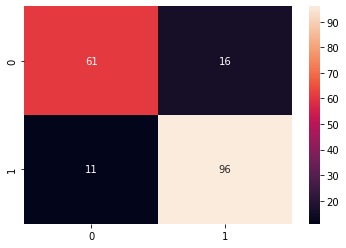

In [81]:
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(1000, 35), alpha=0.05, max_iter=200, random_state = 1, activation='relu', learning_rate='adaptive')
mlp.fit(x_train, y_train)
y_hat = mlp.predict(x_test)
print(y_hat)
print(np.array(y_test))
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat, average='micro')
recall = recall_score(y_test, y_hat, average='micro')
f1 = f1_score(y_test, y_hat, average='micro')
scores['mlp'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['mlp'])

In [22]:
# Please save scores like the example below
scores['knn'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}

IndentationError: unexpected indent (2760325245.py, line 2)

In [7]:
#x is everything but heart disease
x = heart_df.loc[:, heart_df.columns != "HeartDisease"]
#y is heart disease
y = heart_df['HeartDisease']
# splits dataset; 80 percent train: 20 percent test
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)
#scales down the x values
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
classifier = LogisticRegression(random_state=0)
#Fits dataset
classifier.fit(x_train, y_train)
#gets predicted values
y_pred= classifier.predict(x_test)
#compares predictions to actual values
cm= confusion_matrix(y_pred, y_test)
print(cm)
"""total_squared_error = (np.sum((y_test - y_pred)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)"""
"""x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2,x3,x4,x5,x6,x7,x8,x9,x10,x11 classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()""" 

[[60 11]
 [17 96]]


"x_set, y_set = x_train, y_train  \nx1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  \nnp.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  \nplt.contourf(x1, x2,x3,x4,x5,x6,x7,x8,x9,x10,x11 classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  \nalpha = 0.75, cmap = ListedColormap(('purple','green' )))  \nplt.xlim(x1.min(), x1.max())  \nplt.ylim(x2.min(), x2.max())  \nfor i, j in enumerate(np.unique(y_set)):  \n    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  \n        c = ListedColormap(('purple', 'green'))(i), label = j)  \nplt.title('Logistic Regression (Training set)')  \nplt.xlabel('Age')  \nplt.ylabel('Estimated Salary')  \nplt.legend()  \nplt.show()"

(734, 11)


1/6 [====>.........................] - ETA: 0s

6/6 [==============================] - 0s 2ms/step


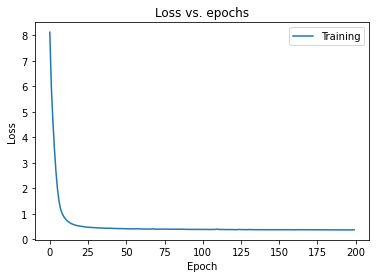

[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1
 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1
 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0]


1/6 [====>.........................] - ETA: 1s - loss: 0.4591 - accuracy: 0.8750

6/6 [==============================] - 0s 3ms/step - loss: 0.3694 - accuracy: 0.8750


In [97]:
import copy
print(x_train.shape)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)
CNN = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(11,1)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.005)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.005)),
    tf.keras.layers.Dense(10)
])
CNN.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
CNN_history = CNN.fit(x_train, y_train, epochs=200, verbose = False)
prediction = CNN.predict(x_test)
y_hat = []
for i in range(0,len(prediction)):
    prediction[i] = np.argmax(prediction[i])
for i in range(0,len(prediction)):
    y_hat.append(int(prediction[i][0]))
plt.plot(CNN_history.history['loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()
print(y_hat)
print(np.array(y_test))
test_loss, test_acc = CNN.evaluate(x_test,  y_test)

Model: "sequential_32"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense_125 (Dense)           (None, 145)               1740      


 dense_126 (Dense)           (None, 120)               17520     


 dense_127 (Dense)           (None, 70)                8470      


 dense_128 (Dense)           (None, 50)                3550      


 dense_129 (Dense)           (None, 1)                 51        


Total params: 31,331


Trainable params: 31,331


Non-trainable params: 0


_________________________________________________________________


Epoch 1/25


 1/10 [==>...........................] - ETA: 8s - loss: 8.0816 - accuracy: 0.5455

10/10 [==============================] - 1s 39ms/step - loss: 7.7173 - accuracy: 0.6667 - val_loss: 7.2177 - val_accuracy: 0.7557


Epoch 2/25


 1/10 [==>...........................] - ETA: 0s - loss: 7.2245 - accuracy: 0.7273

10/10 [==============================] - 0s 11ms/step - loss: 6.8790 - accuracy: 0.7914 - val_loss: 6.4037 - val_accuracy: 0.8326


Epoch 3/25


 1/10 [==>...........................] - ETA: 0s - loss: 6.4321 - accuracy: 0.8364

10/10 [==============================] - 0s 11ms/step - loss: 6.0906 - accuracy: 0.8343 - val_loss: 5.6369 - val_accuracy: 0.8552


Epoch 4/25


 1/10 [==>...........................] - ETA: 0s - loss: 5.6314 - accuracy: 0.8727

10/10 [==============================] - ETA: 0s - loss: 5.3641 - accuracy: 0.8460

10/10 [==============================] - 0s 15ms/step - loss: 5.3641 - accuracy: 0.8460 - val_loss: 4.9374 - val_accuracy: 0.8643


Epoch 5/25


 1/10 [==>...........................] - ETA: 0s - loss: 4.9158 - accuracy: 0.8909

10/10 [==============================] - 0s 12ms/step - loss: 4.7003 - accuracy: 0.8460 - val_loss: 4.3009 - val_accuracy: 0.8778


Epoch 6/25


 1/10 [==>...........................] - ETA: 0s - loss: 4.3904 - accuracy: 0.8182

10/10 [==============================] - ETA: 0s - loss: 4.0944 - accuracy: 0.8538

10/10 [==============================] - 0s 12ms/step - loss: 4.0944 - accuracy: 0.8538 - val_loss: 3.7298 - val_accuracy: 0.8733


Epoch 7/25


 1/10 [==>...........................] - ETA: 0s - loss: 3.7248 - accuracy: 0.8727

10/10 [==============================] - 0s 11ms/step - loss: 3.5435 - accuracy: 0.8596 - val_loss: 3.2138 - val_accuracy: 0.8778


Epoch 8/25


 1/10 [==>...........................] - ETA: 0s - loss: 3.3258 - accuracy: 0.8182

10/10 [==============================] - ETA: 0s - loss: 3.0452 - accuracy: 0.8538

10/10 [==============================] - 0s 19ms/step - loss: 3.0452 - accuracy: 0.8538 - val_loss: 2.7464 - val_accuracy: 0.8824


Epoch 9/25


 1/10 [==>...........................] - ETA: 0s - loss: 2.7739 - accuracy: 0.8727

10/10 [==============================] - ETA: 0s - loss: 2.5994 - accuracy: 0.8616

10/10 [==============================] - 0s 12ms/step - loss: 2.5994 - accuracy: 0.8616 - val_loss: 2.3304 - val_accuracy: 0.8733


Epoch 10/25


 1/10 [==>...........................] - ETA: 0s - loss: 2.3417 - accuracy: 0.8727

10/10 [==============================] - 0s 11ms/step - loss: 2.1991 - accuracy: 0.8635 - val_loss: 1.9599 - val_accuracy: 0.8824


Epoch 11/25


 1/10 [==>...........................] - ETA: 0s - loss: 1.9752 - accuracy: 0.8545

10/10 [==============================] - 0s 10ms/step - loss: 1.8481 - accuracy: 0.8577 - val_loss: 1.6376 - val_accuracy: 0.8778


Epoch 12/25


 1/10 [==>...........................] - ETA: 0s - loss: 1.6897 - accuracy: 0.8727

10/10 [==============================] - 0s 10ms/step - loss: 1.5443 - accuracy: 0.8616 - val_loss: 1.3626 - val_accuracy: 0.8778


Epoch 13/25


 1/10 [==>...........................] - ETA: 0s - loss: 1.3963 - accuracy: 0.8545

10/10 [==============================] - 0s 10ms/step - loss: 1.2873 - accuracy: 0.8616 - val_loss: 1.1351 - val_accuracy: 0.8778


Epoch 14/25


 1/10 [==>...........................] - ETA: 0s - loss: 1.0942 - accuracy: 0.9091

10/10 [==============================] - 0s 11ms/step - loss: 1.0792 - accuracy: 0.8655 - val_loss: 0.9550 - val_accuracy: 0.8869


Epoch 15/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.9423 - accuracy: 0.8364

10/10 [==============================] - ETA: 0s - loss: 0.9183 - accuracy: 0.8616

10/10 [==============================] - 0s 12ms/step - loss: 0.9183 - accuracy: 0.8616 - val_loss: 0.8246 - val_accuracy: 0.8778


Epoch 16/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.6972 - accuracy: 0.9091

10/10 [==============================] - 0s 11ms/step - loss: 0.8051 - accuracy: 0.8616 - val_loss: 0.7298 - val_accuracy: 0.8733


Epoch 17/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.7831 - accuracy: 0.8545

10/10 [==============================] - 0s 11ms/step - loss: 0.7193 - accuracy: 0.8694 - val_loss: 0.6612 - val_accuracy: 0.8778


Epoch 18/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.5333 - accuracy: 0.9455

10/10 [==============================] - 0s 10ms/step - loss: 0.6608 - accuracy: 0.8674 - val_loss: 0.6125 - val_accuracy: 0.8733


Epoch 19/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.6349 - accuracy: 0.8727

10/10 [==============================] - 0s 11ms/step - loss: 0.6179 - accuracy: 0.8694 - val_loss: 0.5747 - val_accuracy: 0.8778


Epoch 20/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.6308 - accuracy: 0.8545

10/10 [==============================] - ETA: 0s - loss: 0.5830 - accuracy: 0.8694

10/10 [==============================] - 0s 12ms/step - loss: 0.5830 - accuracy: 0.8694 - val_loss: 0.5469 - val_accuracy: 0.8778


Epoch 21/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.4785 - accuracy: 0.9273

 9/10 [==========================>...] - ETA: 0s - loss: 0.5574 - accuracy: 0.8687

10/10 [==============================] - 0s 13ms/step - loss: 0.5540 - accuracy: 0.8713 - val_loss: 0.5245 - val_accuracy: 0.8824


Epoch 22/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.5544 - accuracy: 0.8727

10/10 [==============================] - 0s 11ms/step - loss: 0.5341 - accuracy: 0.8694 - val_loss: 0.5093 - val_accuracy: 0.8778


Epoch 23/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.4869 - accuracy: 0.8909

 9/10 [==========================>...] - ETA: 0s - loss: 0.5199 - accuracy: 0.8747

10/10 [==============================] - 0s 15ms/step - loss: 0.5208 - accuracy: 0.8733 - val_loss: 0.4994 - val_accuracy: 0.8869


Epoch 24/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.6037 - accuracy: 0.8364

10/10 [==============================] - 0s 9ms/step - loss: 0.5105 - accuracy: 0.8694 - val_loss: 0.4916 - val_accuracy: 0.8869


Epoch 25/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.5433 - accuracy: 0.8909

 8/10 [=======================>......] - ETA: 0s - loss: 0.4902 - accuracy: 0.8773

10/10 [==============================] - 0s 17ms/step - loss: 0.5019 - accuracy: 0.8713 - val_loss: 0.4835 - val_accuracy: 0.8824


1/6 [====>.........................] - ETA: 0s

6/6 [==============================] - 0s 6ms/step


1/6 [====>.........................] - ETA: 0s - loss: 0.5819 - accuracy: 0.8750

6/6 [==============================] - 0s 6ms/step - loss: 0.4910 - accuracy: 0.8804


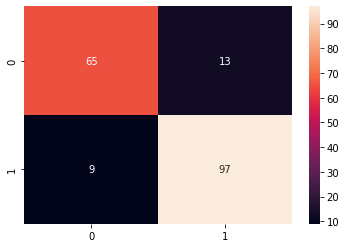

In [100]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)
CNN2 = tf.keras.Sequential()
CNN2.add(tf.keras.layers.Dense(units=145,activation="relu",input_dim=11))
CNN2.add(tf.keras.layers.Dense(units=120,activation="relu",  kernel_regularizer=tf.keras.regularizers.l1(0.003)))
CNN2.add(tf.keras.layers.Dense(units=70,activation="relu",  kernel_regularizer=tf.keras.regularizers.l1(0.003)))
CNN2.add(tf.keras.layers.Dense(units=50,activation="relu",  kernel_regularizer=tf.keras.regularizers.l1(0.003)))
CNN2.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
CNN2.summary()
CNN2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
CNN2_his=CNN2.fit(x_train,y_train,validation_split=0.30, batch_size=55,epochs=25)
y_pred=CNN2.predict(x_test)
y_pred = (y_pred > 0.5)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
test_loss, test_acc = CNN2.evaluate(x_test,  y_test)

A neural network works through different layers. There is 1 input layer, 1 output layer, and a custom amount of hidden layers. The different nodes in the hidden layers are supposed to simulate how brains work. Basically, each node is a combination of the inputs in some way. My neural network also works with a validation split, which are a part of the training split. They make sure that the model is moving in the right direction when training. This neural network has 3 hidden layers with a 0.88 accuracy rating.


In [108]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(acc, prec, recall, f1)
scores['CNN'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['CNN'])

0.8804347826086957 0.8818181818181818 0.9150943396226415 0.8981481481481483
{'accuracy': 0.8804347826086957, 'precision': 0.8818181818181818, 'recall': 0.9150943396226415, 'f1_score': 0.8981481481481483}


In [44]:
tree_model = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 21)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=21)

In [45]:
y_hat = tree_model.predict(x_test)
y_hat

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1])

In [47]:
total_squared_error = (np.sum((y_test - y_hat)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

0.14130434782608695


0.8586956521739131 0.8611111111111112 0.8942307692307693 0.8773584905660378
{'accuracy': 0.8586956521739131, 'precision': 0.8611111111111112, 'recall': 0.8942307692307693, 'f1_score': 0.8773584905660378}


{'accuracy': 0.842391304347826, 'precision': 0.8913043478260869, 'recall': 0.8118811881188119, 'f1_score': 0.8497409326424871}


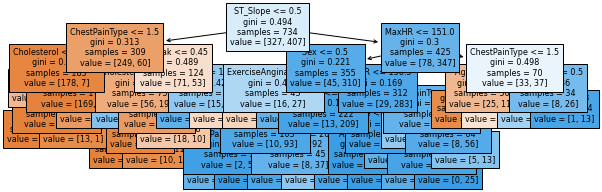

In [135]:
tree_model = tree.DecisionTreeClassifier(max_depth = 54, min_samples_split = 33, min_samples_leaf= 11)
tree_model.fit(x_train, y_train)
y_hat = tree_model.predict(x_test)
fig = plt.figure(figsize=(10,3))
tree_plot = tree.plot_tree(tree_model, feature_names=input_columns.columns, filled=True, fontsize=8)
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
scores['DTC'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['DTC'])




{'accuracy': 0.8369565217391305, 'precision': 0.8585858585858586, 'recall': 0.8415841584158416, 'f1_score': 0.85}


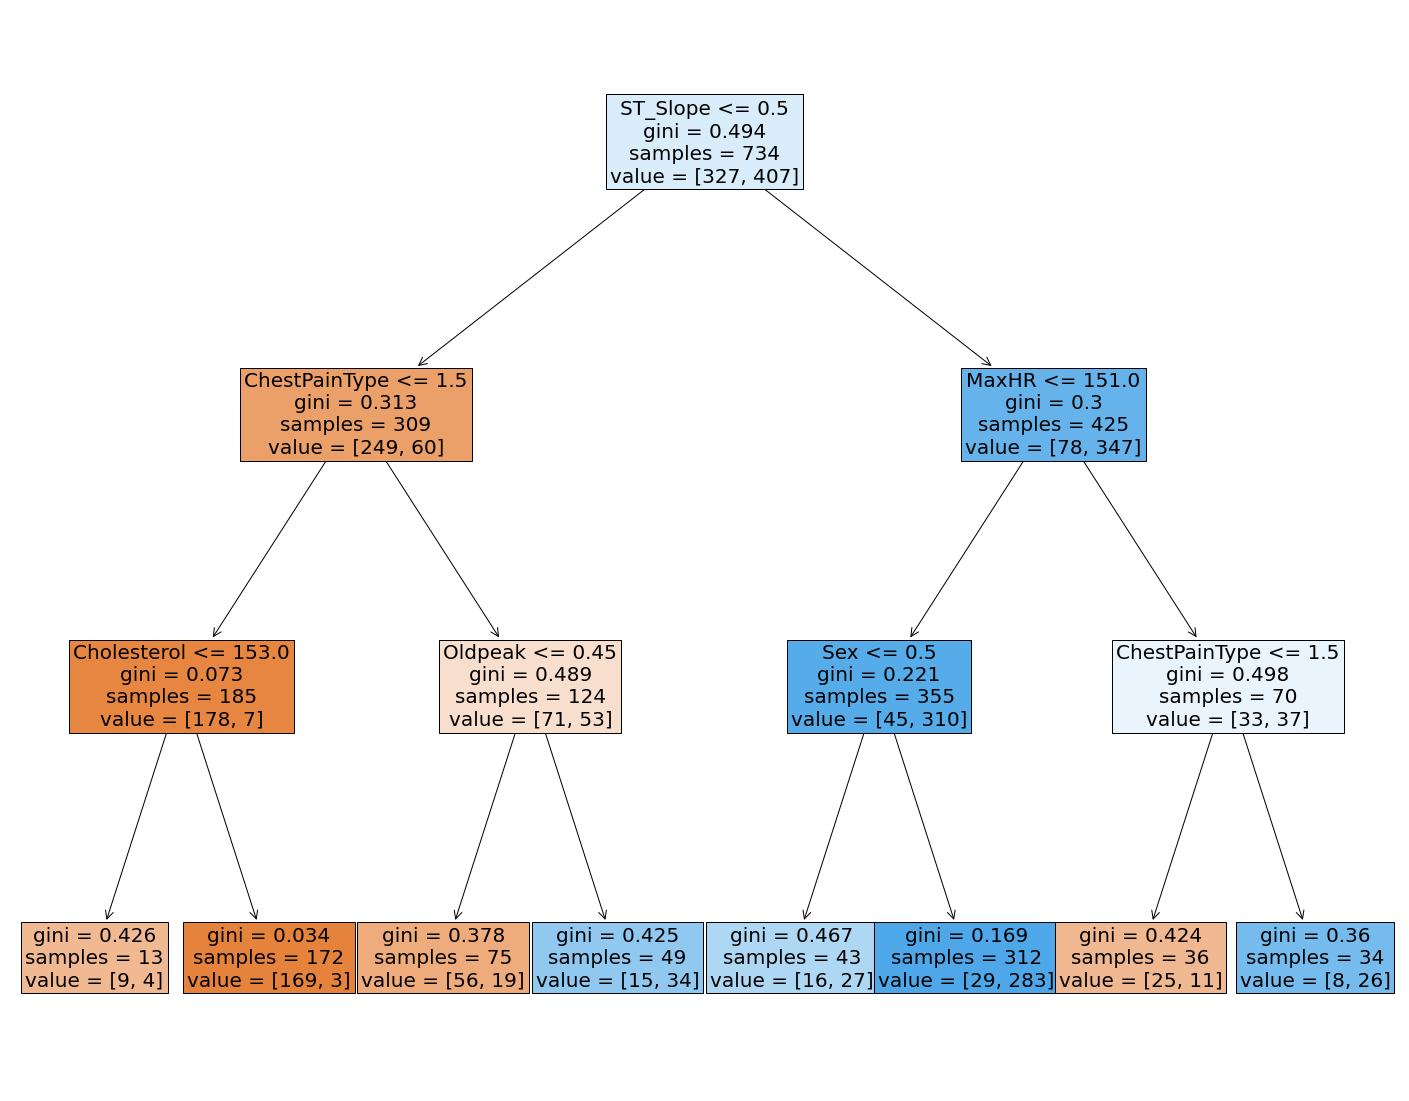

In [138]:
tree_model = tree.DecisionTreeClassifier(max_depth = 3)
tree_model.fit(x_train, y_train)
y_hat = tree_model.predict(x_test)
fig = plt.figure(figsize=(25,20))
tree_plot = tree.plot_tree(tree_model, feature_names=input_columns.columns, filled=True, fontsize=20)
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
scores['DTC'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['DTC'])




<AxesSubplot:>

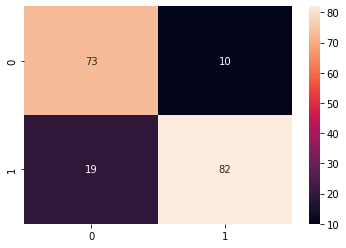

In [127]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

A decision tree classifier model classifies data as it passes through the nodes in the tree and uses the gini index to determine where to split. In order to optimize the decision tree, I used cv and randomized cv to find the best hyperparameters. It has a max depth of 54, minimum samples split of 33, minimum samples leaf of 11, and accuracy of 0.84. 


In [123]:
param_grid = {'max_depth': range(1,160), 'min_samples_split': range(2, 160), 'min_samples_leaf': range(1, 160)}
gs = RandomizedSearchCV(DecisionTreeClassifier(),param_grid, n_iter = 10000)
gs.fit(x_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=10000,
                   param_distributions={'max_depth': range(1, 160),
                                        'min_samples_leaf': range(1, 160),
                                        'min_samples_split': range(2, 160)})

In [124]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=54, min_samples_leaf=11, min_samples_split=33)

In [125]:
gs.best_score_

0.8542260739912402

In [183]:
#Random Forest Model
rf_model = RFC(n_estimators=67, max_depth= 90)
rf_model.fit(x_train, y_train)
y_hat = rf_model.predict(x_test)

prec = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
print(acc, prec, recall, f1)



0.8913043478260869 0.9565217391304348 0.9090909090909091 0.9322033898305085


In [184]:
y_hat = rf_model.predict(x_test)
y_hat

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0])

In [185]:
total_squared_error = (np.sum((y_test - y_hat)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

0.08695652173913043


<AxesSubplot:>

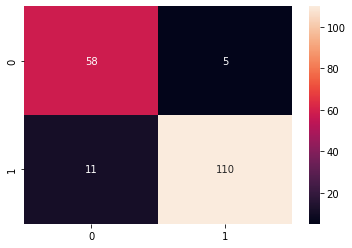

In [186]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

A random forest classifier is an ensemble of decision trees that work together to classify data. I used randomized cv to find the best hyperparameters for the model. The max depth number of estimators is 67, the max depth is 90, and the model has an accuracy of 0.89.



In [176]:
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
print(acc, prec, recall, f1)
scores['RFC'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['RFC'])

0.8913043478260869 0.9316239316239316 0.9008264462809917 0.9159663865546218
{'accuracy': 0.8913043478260869, 'precision': 0.9316239316239316, 'recall': 0.9008264462809917, 'f1_score': 0.9159663865546218}


In [0]:
param_grid = {'n_estimators': range(1, 101), 'max_depth': range(1, 101)}
gs = RandomizedSearchCV(RFC(),param_grid)
gs.fit(x_train, y_train)


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(1, 101),
                                        'n_estimators': range(1, 101)})

In [179]:
gs.best_params_

{'n_estimators': 67, 'max_depth': 90}

In [180]:
gs.best_score_

0.8651383841207714